In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print("semua pustaka berhasil dimuat")

semua pustaka berhasil dimuat


                     **Modeling**

In [14]:
# baca dataset
folder = os.path.join("..", "data")
file = "data_pengangguran_fe.csv"
path = os.path.join(folder, file)

#baca data
df = pd.read_csv(path)
df.head(5)

,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total,Waktu,Tahun,Growth_Rate,Total_lag1
0,170666,611254,2589699,2730045,2851518,1305190,278074,395554,10932000,2006-08-01,2006,-1.555135,2006.0
1,145750,520316,2753548,2643062,2630360,1114675,330316,409890,10547917,2007-02-01,2007,-3.513383,2006.0
2,94301,438519,2179792,2264198,2532204,1538349,397191,566588,10011142,2007-08-01,2007,-5.088919,2007.0
3,79764,448431,2216748,2166619,2204377,1165582,519867,626202,9427590,2008-02-01,2008,-5.829025,2007.0
4,103206,443832,2099968,1973986,2403394,1409128,362683,598318,9394515,2008-08-01,2008,-0.350832,2008.0


In [17]:
# Ambil kolom yang dibutuhkan
df = df[['Tahun', 'Total']]
df = df.groupby('Tahun')['Total'].mean().reset_index()

In [18]:
df

,Tahun,Total
0,2006,10932000.0
1,2007,10279529.5
2,2008,9411052.5
3,2009,9110790.5
4,2010,8456134.5
5,2011,8530637.0
6,2012,7551348.5
7,2013,7325914.0
8,2014,7195987.0
9,2015,7507794.5


In [19]:
# Buat model regresi linear
X = df[['Tahun']]
y = df['Total']

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# Prediksi untuk tahun 2023-2025
tahun_prediksi = pd.DataFrame({'Tahun': [2023, 2024, 2025]})
prediksi = model.predict(tahun_prediksi)
# Gabungkan hasilnya ke tabel
hasil_prediksi = pd.DataFrame({
    'Tahun': [2023, 2024, 2025],
    'Prediksi_Total_Pengangguran': prediksi.astype(int)
})

print("Hasil Prediksi 2023–2025:")
print(hasil_prediksi)

Hasil Prediksi 2023–2025:
   Tahun  Prediksi_Total_Pengangguran
0   2023                      6964488
1   2024                      6823006
2   2025                      6681524


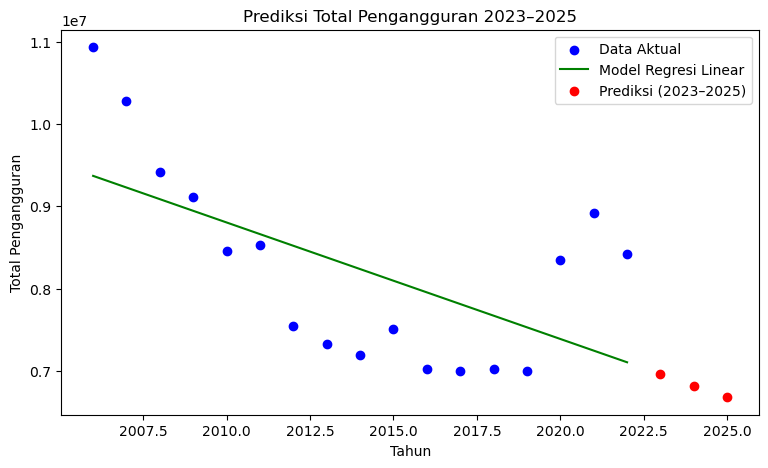

In [26]:
# Visualisasi tren dan prediksi
plt.figure(figsize=(9,5))
plt.scatter(df['Tahun'], df['Total'], color='blue', label='Data Aktual')
plt.plot(df['Tahun'], model.predict(df[['Tahun']]), color='green', label='Model Regresi Linear')
plt.scatter(tahun_prediksi, prediksi, color='red', label='Prediksi (2023–2025)')
plt.xlabel('Tahun')
plt.ylabel('Total Pengangguran')
plt.title('Prediksi Total Pengangguran 2023–2025')
plt.legend()
plt.show()

# 📈 Ringkasan Proses Modeling dan Prediksi Pengangguran

Dokumen ini merangkum tahapan analisis dan modeling tren pengangguran di Indonesia berdasarkan data tahun 2006–2022, serta prediksi untuk tahun 2023–2025 menggunakan regresi linier.

---

## 1. 🧮 Dataset Historis Pengangguran

| Tahun | Total Pengangguran |
|-------|---------------------|
| 2006  | 10,932,000.0        |
| 2007  | 10,279,529.5        |
| 2008  | 9,411,052.5         |
| 2009  | 9,110,790.5         |
| 2010  | 8,456,134.5         |
| 2011  | 8,530,637.0         |
| 2012  | 7,551,348.5         |
| 2013  | 7,325,914.0         |
| 2014  | 7,195,987.0         |
| 2015  | 7,507,794.5         |
| 2016  | 7,027,973.5         |
| 2017  | 7,005,262.0         |
| 2018  | 7,018,421.0         |
| 2019  | 7,001,610.0         |
| 2020  | 8,346,620.0         |
| 2021  | 8,924,030.0         |
| 2022  | 8,418,005.0         |

---

## 2. 🔍 Tujuan Modeling

- Menganalisis tren jumlah pengangguran dari tahun ke tahun
- Memprediksi jumlah pengangguran untuk tahun 2023–2025
- Menyediakan visualisasi tren aktual dan prediksi

---

## 3. 📊 Metode dan Model

- **Model**: Regresi Linier
- **Fitur**: Tahun
- **Target**: Total Pengangguran
- **Evaluasi**: Visualisasi tren dan prediksi

---

## 4. 📉 Hasil Prediksi 2023–2025

| Tahun | Prediksi Total Pengangguran |
|-------|------------------------------|
| 2023  | 6,964,488                    |
| 2024  | 6,823,006                    |
| 2025  | 6,681,524                    |

---

## 5. 🖼️ Visualisasi

Grafik menunjukkan:
- Titik biru: Data aktual (2006–2022)
- Garis hijau: Model regresi linier
- Titik merah: Prediksi 2023–2025

> Tren menunjukkan penurunan jumlah pengangguran secara bertahap hingga tahun 2025.

---

## 6. 📌 Catatan

- Lonjakan pengangguran tahun 2020–2021 kemungkinan dipengaruhi oleh pandemi
- Model linier digunakan sebagai pendekatan awal; model lain dapat diuji untuk akurasi lebih tinggi

